In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: C:\Users\ozgur\Desktop\sandbox\sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [5]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [6]:
print('Number of categories: %d' % len(categories))

Number of categories: 345


In [7]:
list(categories.keys())[:10]

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm']

In [8]:
category = input("Selected category from the list above: ") or 'cat'
# Checking to see if the entered category is in the categories dictionary
assert categories.get(category)

Selected category from the list above: moon


In [9]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, category)

Creating directories to save images, weights and the model ...
folders are created...


In [10]:
option = input("Select a download method ... \n 1. Use Google Cloud credentials stored in a json file \n 2. Use gsutil in the notebook \n 3. Use gsutil in the terminal \n")

Select a download method ... 
 1. Use Google Cloud credentials stored in a json file 
 2. Use gsutil in the notebook 
 3. Use gsutil in the terminal 
2


In [11]:
if option == "1":
    download_data(src_list, dst_list)
elif option == "2":
    for (src_file, dst_file) in zip(src_list, dst_list): 
        print('gs://quickdraw_dataset/' + src_file, dst_file)
        !gsutil -m cp {'gs://quickdraw_dataset/' + src_file} {dst_file}
elif option == "3":
    print('Type the following in the terminal to download the files manually:')
    for (src_file, dst_file) in zip(src_list, dst_list):
        print("gsutil -m cp " + "gs://quickdraw_dataset/" + "{}".format(src_file) + " " + "{}".format(dst_file))

gs://quickdraw_dataset/full/numpy_bitmap/moon.npy C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\moon\moon.npy
gs://quickdraw_dataset/full/raw/moon.ndjson C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\moon\moon.ndjson


Copying gs://quickdraw_dataset/full/numpy_bitmap/moon.npy...
/ [0/1 files][    0.0 B/ 91.0 MiB]   0% Done                                    
/ [0/1 files][264.0 KiB/ 91.0 MiB]   0% Done                                    
-
\
\ [0/1 files][  8.2 MiB/ 91.0 MiB]   9% Done                                    
|
/
/ [0/1 files][ 16.8 MiB/ 91.0 MiB]  18% Done                                    
-
- [0/1 files][ 27.6 MiB/ 91.0 MiB]  30% Done                                    
\
|
| [0/1 files][ 38.4 MiB/ 91.0 MiB]  42% Done                                    
/
-
- [0/1 files][ 48.2 MiB/ 91.0 MiB]  53% Done                                    
\
|
| [0/1 files][ 57.8 MiB/ 91.0 MiB]  63% Done                                    
/
/ [0/1 files][ 64.2 MiB/ 91.0 MiB]  70% Done                                    
-
\
\ [0/1 files][ 72.2 MiB/ 91.0 MiB]  79% Done                                    
|
/
/ [0/1 files][ 79.4 MiB/ 91.0 MiB]  87% Done   6.8 MiB/s ETA 00:00:02           
-
- [0/1 files][

In [12]:
model_path = os.path.join(paths_dict['input_path'], category, category)

In [13]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [14]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [15]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [16]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  121662  images in selected category moon
Select an index value from 0 to 121661 to display and compare bitmap and raw images:
Bitmap image:


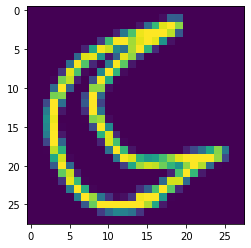

Raw image:
There are 1 number of strokes in this raw image file!


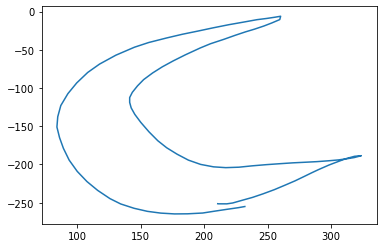

In [29]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index = '0'
plot_bitmap()
plt.show()
plot_raw()

In [18]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [19]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [20]:
train_data = Dataset(x_train)
test_data = Dataset(x_test)

In [21]:
model = DRAW(category)

In [22]:
# TRAINING AND TESTING
print("training...")
model.start(phase='train') 

training...


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\draw_model.py:211: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), self.clip)


Phase: train | Epoch: 0 | Count: 100 \ Start Time: 03:17:33 | Loss: 222
Phase: train | Epoch: 0 | Count: 200 \ Start Time: 03:18:35 | Loss: 191
Phase: train | Epoch: 0 | Count: 300 \ Start Time: 03:19:38 | Loss: 186
Phase: train | Epoch: 0 | Count: 400 \ Start Time: 03:20:42 | Loss: 184
Phase: train | Epoch: 0 | Count: 500 \ Start Time: 03:21:49 | Loss: 181
Phase: train | Epoch: 0 | Count: 600 \ Start Time: 03:23:02 | Loss: 173
Phase: train | Epoch: 0 | Count: 700 \ Start Time: 03:24:17 | Loss: 163
Phase: train | Epoch: 0 | Count: 800 \ Start Time: 03:25:28 | Loss: 153
Phase: train | Epoch: 0 | Count: 900 \ Start Time: 03:26:29 | Loss: 150
Phase: train | Epoch: 0 | Count: 1000 \ Start Time: 03:27:31 | Loss: 144
Phase: train | Epoch: 0 | Count: 1100 \ Start Time: 03:28:37 | Loss: 140
Phase: train | Epoch: 0 | Count: 1200 \ Start Time: 03:29:39 | Loss: 136
Phase: train | Epoch: 0 | Count: 1300 \ Start Time: 03:30:40 | Loss: 137
Phase: train | Epoch: 0 | Count: 1400 \ Start Time: 03:31:42

Phase: train | Epoch: 7 | Count: 11500 \ Start Time: 05:18:20 | Loss: 46
Phase: train | Epoch: 7 | Count: 11600 \ Start Time: 05:19:24 | Loss: 48
Phase: train | Epoch: 7 | Count: 11700 \ Start Time: 05:20:29 | Loss: 48
Phase: train | Epoch: 7 | Count: 11800 \ Start Time: 05:21:33 | Loss: 47
Phase: train | Epoch: 7 | Count: 11900 \ Start Time: 05:22:37 | Loss: 48
Phase: train | Epoch: 7 | Count: 12000 \ Start Time: 05:23:41 | Loss: 49
Phase: train | Epoch: 7 | Count: 12100 \ Start Time: 05:24:45 | Loss: 46
Phase: train | Epoch: 8 | Count: 12200 \ Start Time: 05:25:49 | Loss: 47
Phase: train | Epoch: 8 | Count: 12300 \ Start Time: 05:26:53 | Loss: 47
Phase: train | Epoch: 8 | Count: 12400 \ Start Time: 05:27:58 | Loss: 46
Phase: train | Epoch: 8 | Count: 12500 \ Start Time: 05:29:01 | Loss: 44
Phase: train | Epoch: 8 | Count: 12600 \ Start Time: 05:30:07 | Loss: 45
Phase: train | Epoch: 8 | Count: 12700 \ Start Time: 05:31:12 | Loss: 44
Phase: train | Epoch: 8 | Count: 12800 \ Start Time

## Generating Images

In [30]:
test_model = Test(category)

In [31]:
dataloader = test_model.dataloaders['train']

In [32]:
data = dataloader.next_batch(test_model.batch_size)

In [33]:
data.shape

(64, 784)

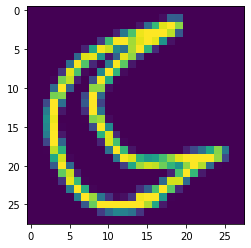

In [34]:
plt.imshow(npy_data[int(index)].reshape(28,28))

reconstructing images...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_test_9.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\m

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.19102888e-36, 1.21299873e-31, 2.43768660e-28, 4.35705412e-26,
        6.61047344e-25, 3.53194129e-24, 3.38512426e-23, 2.92931393e-22,
        1.87593067e-22, 3.30519289e-24, 1.02133313e-26, 5.28658802e-29,
        6.30634334e-31,

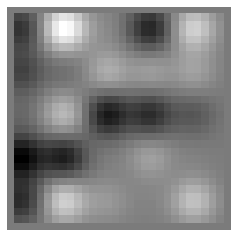

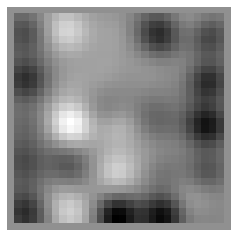

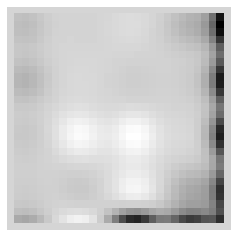

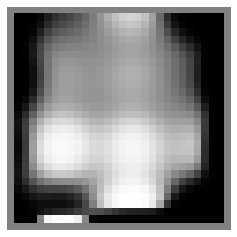

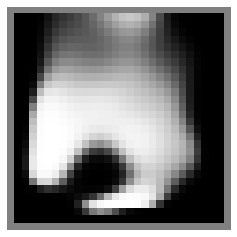

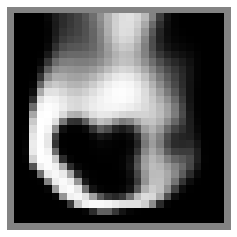

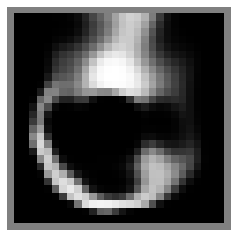

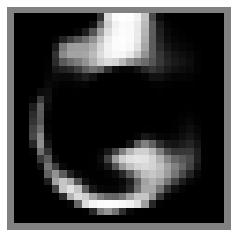

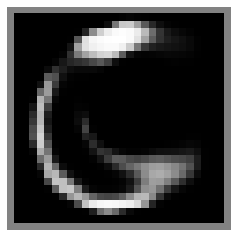

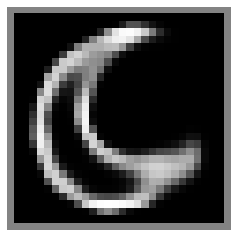

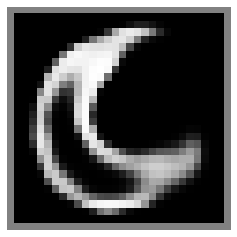

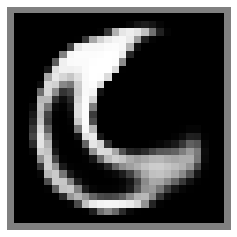

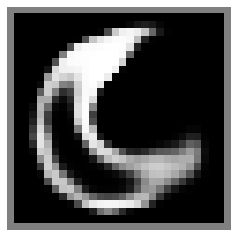

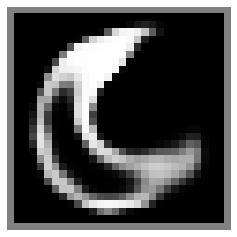

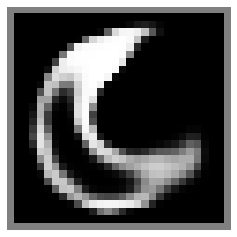

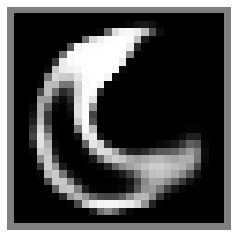

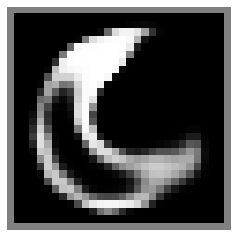

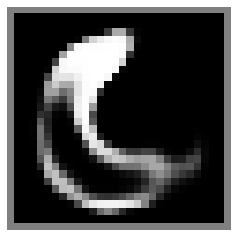

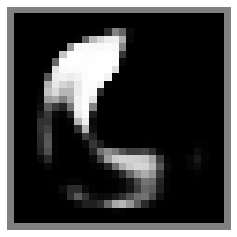

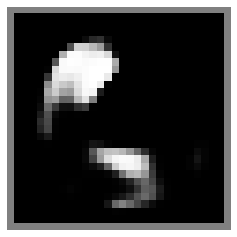

In [35]:
print("reconstructing images...")
test_model.xrecons_grid(int(index), data)